### Лабораторная №4
### Щербо Татьяны

In [443]:
N = 29
binary_cols = ['ss', 'interest', 'weekend_study', 'bad_sleep', 'glasses', 'anime', 'study_form', 'literature']
y_col = binary_cols[N % 8]
y_col

'anime'

In [444]:
import sys
sys.executable

'/Users/soul/.ssh/oiad-3-2025/.venv/bin/python'

In [445]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [446]:

file_path = os.path.join("./data", "famcs_students.csv")
print(os.path.abspath(file_path))

/Users/soul/.ssh/oiad-3-2025/Shcherbo/data/famcs_students.csv


In [447]:
data = pd.read_csv(file_path)

data = data.drop('cource', axis=1)
data = data.drop('stream', axis=1)
data = data.drop('foot_size', axis=1)
data = data.drop('height', axis=1)

print(data.head(5))
print(data.count())

   group sex   age   ss          interest       os weekend_study bad_sleep  \
0     11   М  20.0  Нет        Математика    MacOS            Да        Да   
1     11   Ж  20.0  Нет  Программирование    MacOS           Нет       Нет   
2     11   Ж  19.0  Нет  Программирование    MacOS            Да       Нет   
3     11   Ж  20.0  Нет        Математика    MacOS            Да        Да   
4     11   М  20.0  Нет        Математика  Windows            Да       Нет   

  glasses work_experience  ... anime      social                      sport  \
0     Нет     Меньше года  ...   Нет  Экстраверт  Редко, легкая физкультура   
1     Нет        1-2 года  ...   Нет  Экстраверт            Да, я спортсмен   
2     Нет     Меньше года  ...   Нет  Экстраверт                 Вообще нет   
3     Нет        1-2 года  ...   Нет  Экстраверт            Да, я спортсмен   
4     Нет      Не работаю  ...   Нет   Интроверт                 Вообще нет   

   miss  study_form eye_color score  retake            h

In [448]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   group            127 non-null    int64  
 1   sex              127 non-null    object 
 2   age              127 non-null    float64
 3   ss               127 non-null    object 
 4   interest         127 non-null    object 
 5   os               127 non-null    object 
 6   weekend_study    127 non-null    object 
 7   bad_sleep        127 non-null    object 
 8   glasses          127 non-null    object 
 9   work_experience  127 non-null    object 
 10  ai               127 non-null    object 
 11  anime            127 non-null    object 
 12  social           127 non-null    object 
 13  sport            127 non-null    object 
 14  miss             127 non-null    float64
 15  study_form       127 non-null    object 
 16  eye_color        127 non-null    object 
 17  score           

### 0. Подготовка данных

#### 1. проверить наличие пропусков и выбросов

In [449]:
print("Пропуски в данных:")
print(data.isnull().sum())

Пропуски в данных:
group              0
sex                0
age                0
ss                 0
interest           0
os                 0
weekend_study      0
bad_sleep          0
glasses            0
work_experience    0
ai                 0
anime              0
social             0
sport              0
miss               0
study_form         0
eye_color          0
score              0
retake             0
hostel             0
literature         0
dtype: int64


In [450]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = data[(data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)]
    count_outliers = len(outliers)
    percent_outliers = count_outliers / len(data) * 100

    print(f"{col}: {count_outliers} ({percent_outliers:.2f}%)")

group: 0 (0.00%)
age: 3 (2.36%)
miss: 8 (6.30%)
score: 3 (2.36%)


In [451]:
print("Размер данных до удаления выбросов:", data.shape)

Размер данных до удаления выбросов: (127, 21)


In [452]:
numeric_cols = ['age']

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

print("Размер данных после удаления выбросов:", data.shape)

Размер данных после удаления выбросов: (124, 21)


#### 2. привести категориальные признаки к числовым

In [453]:
y = data[y_col]
y = y.map({'Да':1, 'Нет': 0})
X = data.drop(columns=[y_col])
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    0
8    0
9    0
Name: anime, dtype: int64

In [454]:
X = pd.get_dummies(X, drop_first=True)

In [455]:
X

,group,age,miss,score,sex_М,ss_Нет,interest_Программирование,os_MacOS,os_Windows,weekend_study_Нет,...,"sport_Редко, легкая физкультура",study_form_Платная,eye_color_Зеленые,eye_color_Карие,eye_color_Серые,retake_1,retake_2+,"hostel_Нет, я из Минска","hostel_Нет, я из регионов",literature_Нет
0,11,20.0,3.0,9.20,True,True,False,True,False,False,...,True,False,False,True,False,False,False,True,False,False
1,11,20.0,5.0,8.80,False,True,True,True,False,True,...,False,False,True,False,False,False,False,True,False,False
2,11,19.0,10.0,8.80,False,True,True,True,False,False,...,False,False,False,True,False,False,False,True,False,False
3,11,20.0,3.0,8.80,False,True,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
4,11,20.0,1.0,9.00,True,True,False,False,True,False,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,1,20.0,1.0,6.29,True,True,True,False,True,True,...,False,False,False,True,False,False,False,True,False,False
123,1,22.0,0.0,6.00,False,True,True,False,True,False,...,True,False,False,True,False,False,False,False,True,True
124,1,21.0,10.0,7.00,True,True,False,False,True,True,...,False,False,False,True,False,False,False,True,False,True
125,1,20.0,1.0,7.00,True,True,True,False,True,False,...,False,False,False,True,False,False,False,False,True,True


#### 3. вычислить парные корреляции признаков

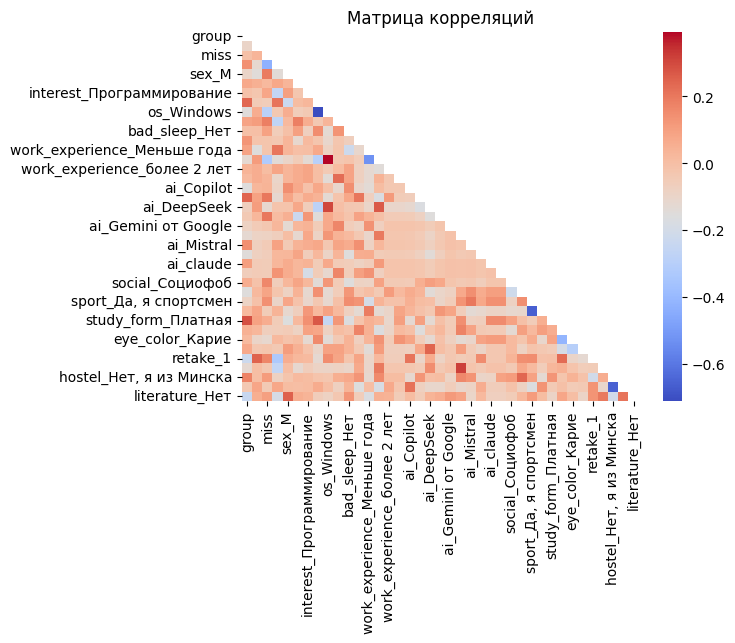

In [456]:
correlations = X.corr()
mask = np.triu(np.ones_like(correlations, dtype=bool))

sns.heatmap(correlations, mask = mask, annot=False, cmap='coolwarm')  
plt.title("Матрица корреляций")
plt.show()

In [457]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

X = np.asarray(X, dtype=float)
y = np.asarray(y)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [458]:
print("Размеры выборок:")
print(f"Train: {X_train.shape[0]} / {y_train.shape[0]}")
print(f"Validation: {X_val.shape[0]} / {y_val.shape[0]}")
print(f"Test: {X_test.shape[0]} / {y_test.shape[0]}")

Размеры выборок:
Train: 86 / 86
Validation: 19 / 19
Test: 19 / 19


In [459]:
vals, counts = np.unique(y, return_counts=True)
print("Классы:", vals)
print("Количество:", counts)
print("Доля:", counts / counts.sum())

Классы: [0 1]
Количество: [71 53]
Доля: [0.57258065 0.42741935]


### Модели

In [460]:
class TrivialClassifier:
    def fit(self, X, y):
        vals, counts = np.unique(y, return_counts=True)
        self.most_common_ = vals[np.argmax(counts)]

    def predict(self, X):
        return np.full(shape=(X.shape[0],), fill_value=self.most_common_, dtype=int)
    
    def predict_proba(self, X):
        p = np.zeros((X.shape[0], 2))
        p[:, self.most_common_] = 1.0
        return p

In [461]:
class NaiveBayes:
    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.class_prior_ = np.array([(y == c).mean() for c in self.classes_])

        self.feature_prob_ = {}
        for c in self.classes_:
            Xc = X[y == c]
            p = Xc.mean(axis=0)
            self.feature_prob_[c] = np.clip(p, 1e-9, 1 - 1e-9)

    def predict_proba(self, X):
        n_samples = X.shape[0]
        probs = np.zeros((n_samples, len(self.classes_)))

        for idx, c in enumerate(self.classes_):
            p = self.feature_prob_[c]
            log_prob = X * np.log(p) + (1 - X) * np.log(1 - p)
            probs[:, idx] = log_prob.sum(axis=1) + np.log(self.class_prior_[c])

        a = probs - probs.max(axis=1, keepdims=True)
        exp = np.exp(a)
        return exp / exp.sum(axis=1, keepdims=True)

    def predict(self, X):
        probs = self.predict_proba(X)
        return self.classes_[np.argmax(probs, axis=1)]

In [462]:
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _distances(self, X):
        a2 = np.sum(X**2, axis=1).reshape(-1,1)  
        b2 = np.sum(self.X_train**2, axis=1).reshape(1,-1)  
        ab = X.dot(self.X_train.T)  
        d2 = a2 + b2 - 2*ab
        d2[d2 < 0] = 0.0
        return np.sqrt(d2)
    
    def predict(self, X):
        d = self._distances(X) 
        idx = np.argpartition(d, self.k, axis=1)[:, :self.k]  
        neigh_labels = self.y_train[idx] 
        preds = np.array([np.bincount(row, minlength=2).argmax() for row in neigh_labels])
        return preds
    
    def predict_proba(self, X):
        d = self._distances(X)
        idx = np.argpartition(d, self.k, axis=1)[:, :self.k]
        neigh_labels = self.y_train[idx]
        prob1 = np.mean(neigh_labels == 1, axis=1)
        probs = np.vstack([1-prob1, prob1]).T
        return probs

In [463]:
import numpy as np

class LogisticRegressionGD:
    def __init__(self, lr=0.1, n_iter=1000, C=1.0):
        self.lr = lr
        self.n_iter = n_iter
        self.C = C  

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        Xn = np.hstack([np.ones((X.shape[0], 1)), X])  
        self.w = np.zeros(Xn.shape[1])

        for _ in range(self.n_iter):
            preds = self.sigmoid(Xn.dot(self.w))
            error = preds - y
            grad = Xn.T.dot(error) / X.shape[0]

            reg = np.r_[0, self.w[1:]] / self.C
            grad += reg

            self.w -= self.lr * grad

        return self

    def predict_proba(self, X):
        Xn = np.hstack([np.ones((X.shape[0], 1)), X])
        probs = self.sigmoid(Xn.dot(self.w))
        return np.vstack([1 - probs, probs]).T

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X)[:,1] >= threshold).astype(int)

## Оценка

In [464]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

def evaluate_model(y_true, y_pred, y_prob=None):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    rocauc = roc_auc_score(y_true, y_prob) if y_prob is not None else None
    
    return {"accuracy": acc, "precision": prec, "recall": rec, "roc_auc": rocauc}

def plot_confusion_matrix(y_true, y_pred, labels=[0,1], title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(4,3))
    plt.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    plt.xticks([0,1], labels)
    plt.yticks([0,1], labels)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(cm[i,j]), ha='center', va='center', color="white" if cm[i,j]>cm.max()/2 else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

Метрики TrivialClassifier: {'accuracy': 0.5789473684210527, 'precision': 0.0, 'recall': 0.0, 'roc_auc': 0.5}


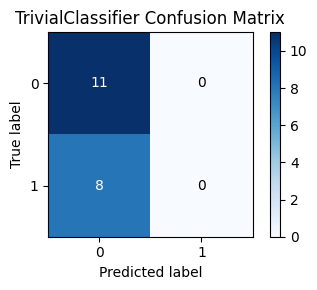

In [465]:
trivial = TrivialClassifier()
trivial.fit(X_train, y_train)

y_pred = trivial.predict(X_test)           # метки
y_prob = trivial.predict_proba(X_test)[:,1]  # вероятность класса 1

metrics = evaluate_model(y_test, y_pred, y_prob)
print("Метрики TrivialClassifier:", metrics)

plot_confusion_matrix(y_test, y_pred, title="TrivialClassifier Confusion Matrix")

Метрики NaiveBayes: {'accuracy': 0.5263157894736842, 'precision': 0.42857142857142855, 'recall': 0.375, 'roc_auc': 0.625}


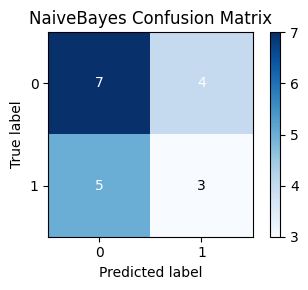

In [466]:
gnb = NaiveBayes()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)                # метки 0/1
y_prob = gnb.predict_proba(X_test)[:, 1]    # вероятность класса 1

metrics = evaluate_model(y_test, y_pred, y_prob)
print("Метрики NaiveBayes:", metrics)

plot_confusion_matrix(y_test, y_pred, title="NaiveBayes Confusion Matrix")

In [467]:
from sklearn.metrics import f1_score

k_candidates = list(range(1, 21))
best_k = None
best_f1 = -1

print("k\tF1 на валидации")
for k in k_candidates:
    knn = KNNClassifier(k=k)
    knn.fit(X_train, y_train)
    y_val_pred = knn.predict(X_val)
    f1 = f1_score(y_val, y_val_pred)
    print(f"{k}\t{f1:.4f}") 
    if f1 > best_f1:
        best_f1 = f1
        best_k = k

print("\nЛучший k:", best_k, "с F1:", best_f1)

k	F1 на валидации
1	0.5556
2	0.2857
3	0.5556
4	0.3750
5	0.5556
6	0.3750
7	0.5263
8	0.1333
9	0.3333
10	0.3077
11	0.2667
12	0.2222
13	0.3077
14	0.3636
15	0.3077
16	0.2222
17	0.1818
18	0.0000
19	0.0000
20	0.0000

Лучший k: 1 с F1: 0.5555555555555556


Метрики KNNClassifier (k=1): {'accuracy': 0.631578947368421, 'precision': 0.5454545454545454, 'recall': 0.75, 'roc_auc': 0.6477272727272727}


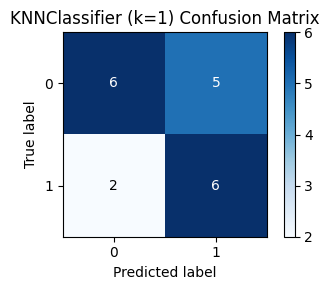

In [468]:
knn = KNNClassifier(k=1)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)               # метки 0/1
y_prob = knn.predict_proba(X_test)[:, 1]   # вероятность класса 1 

metrics = evaluate_model(y_test, y_pred, y_prob)
print("Метрики KNNClassifier (k=1):", metrics)

plot_confusion_matrix(y_test, y_pred, title="KNNClassifier (k=1) Confusion Matrix")

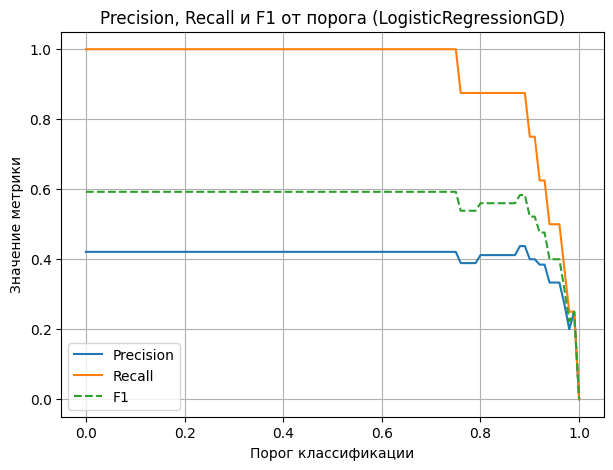

Лучший порог по F1: 0.00


In [469]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

logreg = LogisticRegressionGD(lr=0.1, n_iter=1000, C=1.0)
logreg.fit(X_train, y_train)

y_prob = logreg.predict_proba(X_val)[:, 1]
thresholds = np.linspace(0, 1, 101)

precision_list = []
recall_list = []
f1_list = []

for t in thresholds:
    y_pred = (y_prob >= t).astype(int)
    precision_list.append(precision_score(y_val, y_pred, zero_division=0))
    recall_list.append(recall_score(y_val, y_pred, zero_division=0))
    f1_list.append(f1_score(y_val, y_pred, zero_division=0))

precision_list = np.array(precision_list)
recall_list = np.array(recall_list)
f1_list = np.array(f1_list)

plt.figure(figsize=(7,5))
plt.plot(thresholds, precision_list, label='Precision')
plt.plot(thresholds, recall_list, label='Recall')
plt.plot(thresholds, f1_list, label='F1', linestyle='--')
plt.xlabel('Порог классификации')
plt.ylabel('Значение метрики')
plt.title('Precision, Recall и F1 от порога (LogisticRegressionGD)')
plt.grid(True)
plt.legend()
plt.show()

best_idx = np.argmax(f1_list)
best_threshold = thresholds[best_idx]
print(f"Лучший порог по F1: {best_threshold:.2f}")

y_pred_final = logreg.predict(X_val, threshold=best_threshold)

Метрики LogisticRegressionGD на тесте: {'accuracy': 0.42105263157894735, 'precision': 0.42105263157894735, 'recall': 1.0, 'roc_auc': 0.42045454545454547}


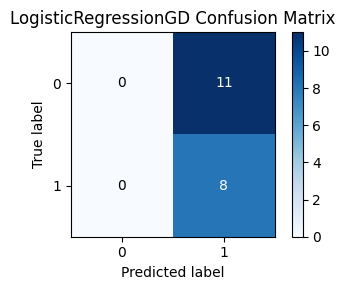

In [470]:
y_pred_test = logreg.predict(X_test, threshold=best_threshold)
y_prob_test = logreg.predict_proba(X_test)[:,1]  

metrics_test = evaluate_model(y_test, y_pred_test, y_prob_test)
print("Метрики LogisticRegressionGD на тесте:", metrics_test)

plot_confusion_matrix(y_test, y_pred_test, title="LogisticRegressionGD Confusion Matrix")